<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [170]:
# Isi dengan data diri Anda
NAMA = "Fahira Adindiah"
KELAS = "C"
NPM = "2106751575"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [171]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahira Adindiah dari kelas C dengan NPM 2106751575, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahira Adindiah)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. **alm2**: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [172]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [173]:
df = pd.read_csv("ecoli.csv")
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [174]:
print(df.isnull().sum())

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   class   336 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 21.1 KB


In [176]:
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [177]:
def handle_outliers_capping(df):
    df_cleaned = df.copy()
    for column in df.columns:
        if df[column].dtype != 'object':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_cap = q1 - 1.5 * iqr
            upper_cap = q3 + 1.5 * iqr
            df_cleaned[column] = df[column].clip(lower_cap, upper_cap)
    return df_cleaned

cleaned_data = handle_outliers_capping(df)
cleaned_data

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


In [178]:
q1 = cleaned_data.quantile(0.25)
q3 = cleaned_data.quantile(0.75)

iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = (cleaned_data < lower_limit) | (cleaned_data > upper_limit)
print ("Jumlah outliers pada setiap atribut:")
print(outliers.sum())

Jumlah outliers pada setiap atribut:
mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64


In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_data = scaler.fit_transform(cleaned_data[numerical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_df.head()


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,-0.051761,-1.447125,-1.110223e-16,0.0,0.512230,-1.207717,-0.716084,-0.812457
1,-2.212876,-0.683534,-1.110223e-16,0.0,0.340336,-0.697111,-0.285665,-0.812457
2,0.308424,-0.683534,-1.110223e-16,0.0,-0.089401,-0.604273,-0.190016,-0.812457
3,0.462790,-0.058777,-1.110223e-16,0.0,0.168441,-0.232923,-0.668259,-0.812457
4,-1.389594,-1.238872,-1.110223e-16,0.0,0.426283,-1.161299,-0.716084,-0.812457


In [180]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

non_numerical_columns = scaled_df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
for col in non_numerical_columns:
    scaled_df[col] = label_encoder.fit_transform(scaled_df[col])

scaled_df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,-0.051761,-1.447125,-1.110223e-16,0.0,0.512230,-1.207717,-0.716084,-0.812457
1,-2.212876,-0.683534,-1.110223e-16,0.0,0.340336,-0.697111,-0.285665,-0.812457
2,0.308424,-0.683534,-1.110223e-16,0.0,-0.089401,-0.604273,-0.190016,-0.812457
3,0.462790,-0.058777,-1.110223e-16,0.0,0.168441,-0.232923,-0.668259,-0.812457
4,-1.389594,-1.238872,-1.110223e-16,0.0,0.426283,-1.161299,-0.716084,-0.812457


In [181]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
selected_columns = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1']

X = scaled_df[selected_columns].values


## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.3398245904139575
For n_clusters = 3 The average silhouette_coefficient is : 0.36289246462751623
For n_clusters = 4 The average silhouette_coefficient is : 0.3649513622877457
For n_clusters = 5 The average silhouette_coefficient is : 0.34883630050106557
For n_clusters = 6 The average silhouette_coefficient is : 0.2765542492593011
For n_clusters = 7 The average silhouette_coefficient is : 0.26615007641784993
For n_clusters = 8 The average silhouette_coefficient is : 0.2609777181674995


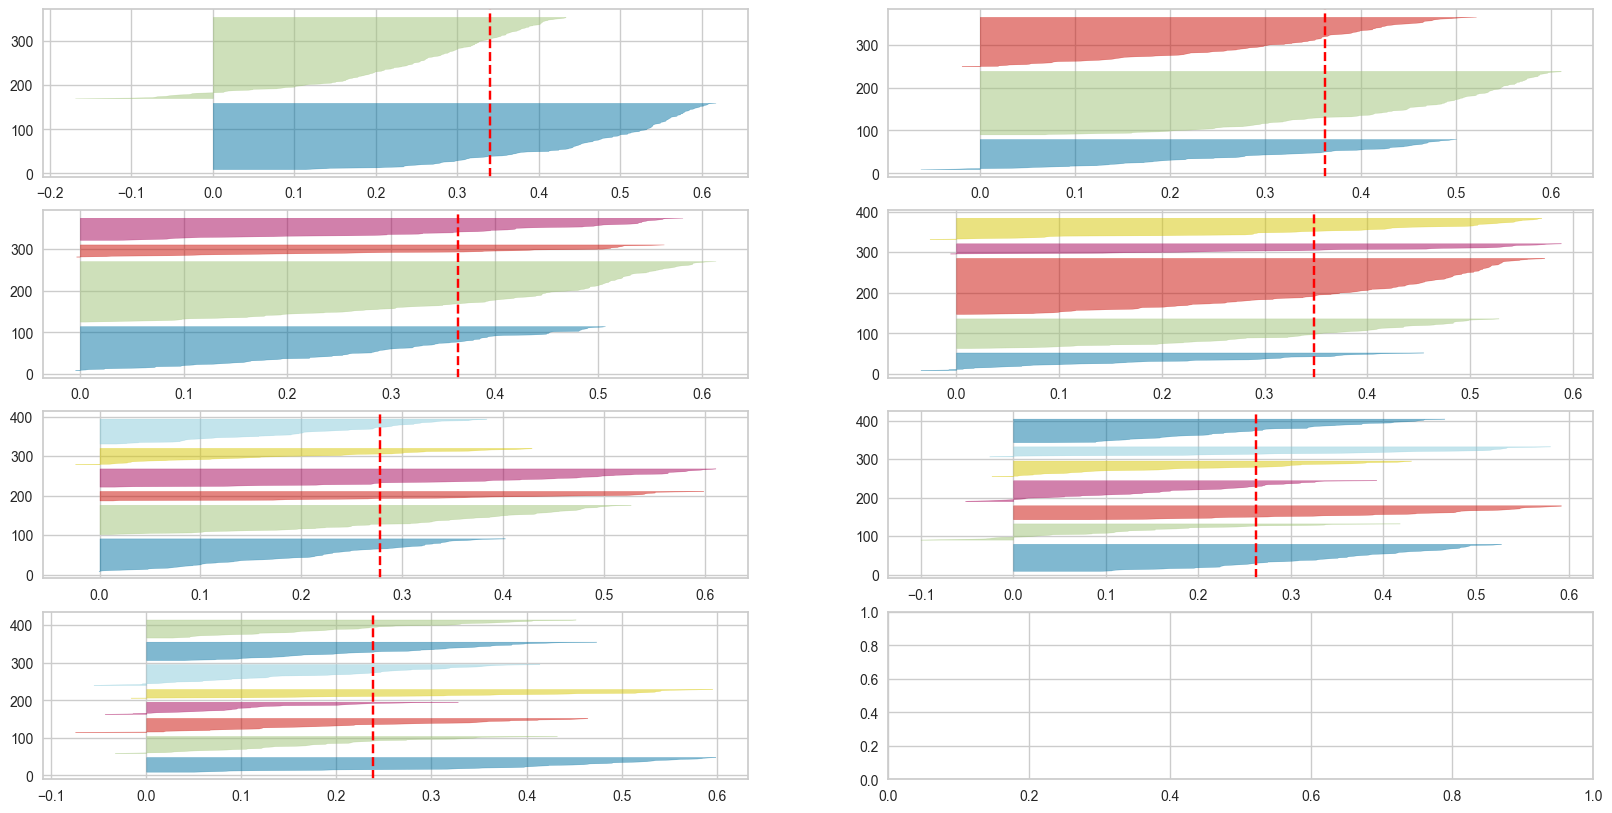

In [182]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
   
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [183]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=3, random_state=42)

cluster_kmeans = kmeans.fit_predict(X)

data_cluster = pd.DataFrame(X.copy(), columns=('mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1'))
data_cluster['Clusters'] = cluster_kmeans


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


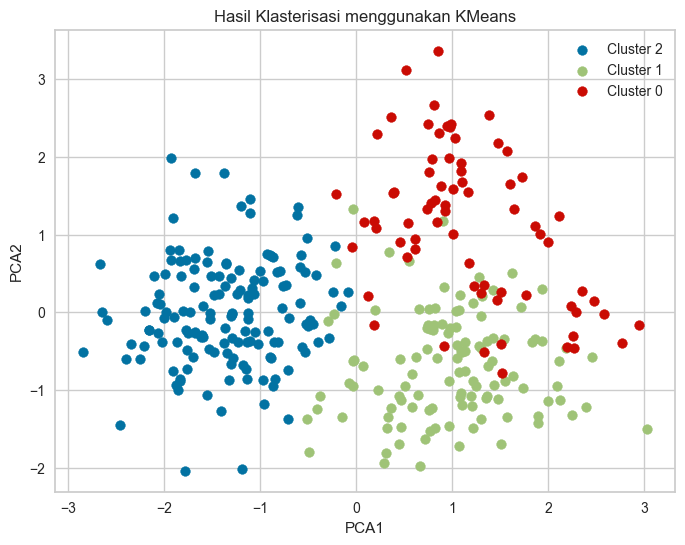

In [184]:
# Menerapkan PCA untuk mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

data_cluster['PCA1'] = X_pca[:, 0]
data_cluster['PCA2'] = X_pca[:, 1]


plt.figure(figsize=(8, 6))
for cluster in data_cluster['Clusters'].unique():
    cluster_data = data_cluster[data_cluster['Clusters'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Hasil Klasterisasi menggunakan KMeans')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

## Hierarchical Clustering [35]

In [185]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [186]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([327, 179, 275, 219, 264, 255, 280, 196, 190, 326, 201, 254, 314,
       245, 244, 289, 307, 204, 305, 220, 252, 195, 291, 328, 237, 215,
       294, 295, 335, 286, 301, 311, 218, 299, 227, 324, 306, 167, 259,
       298, 334, 279, 281, 283, 197, 284, 235, 319, 203, 285, 191, 183,
       223, 142, 309, 200, 228, 300, 232, 172, 303, 325, 233, 315, 317,
       205, 189, 274, 310, 182, 212, 321, 162, 293, 322, 296, 213, 313,
       225, 149, 276, 320, 242, 174, 273, 241, 193, 168, 224, 269, 297,
       176, 216, 263, 238, 250, 198, 206, 192, 101, 141, 229, 171, 181,
       256, 288, 202, 323, 214, 136, 211, 102, 208, 333,  50, 261, 266,
       267,  97, 226, 239, 278, 148, 113, 265, 161,  80, 318, 166, 184,
       169, 253, 234, 147,  98, 287, 194, 177, 316, 222, 143, 260,  85,
       231, 243, 209, 217, 331, 158, 251, 156, 277,  90,  48, 199, 230,
       111, 257, 159, 100, 105, 185, 258, 118, 329, 272, 157, 249, 112,
       312, 186, 139,  96, 131, 155, 180, 107, 221, 240, 175, 27

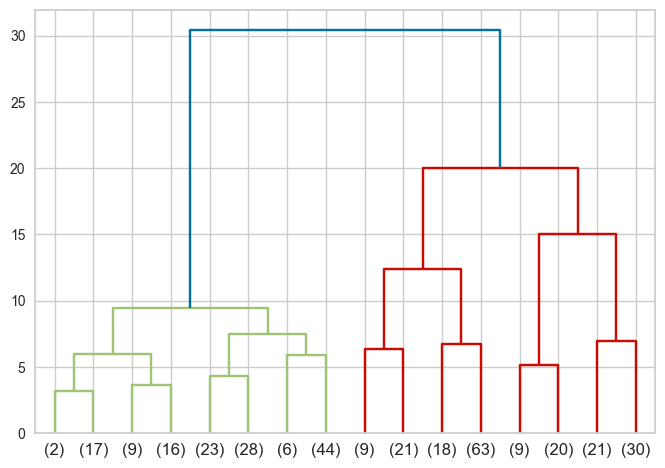

In [187]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.

plot_dendrogram(model, truncate_mode='level', p=3)

In [188]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_cluster['Agg_clusters'] = clustering.fit_predict(X)
data_cluster.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,mcg,gvh,lip,chg,aac,alm1,Clusters,PCA1,PCA2,Agg_clusters
0,-0.051761,-1.447125,-1.110223e-16,0.0,0.512230,-1.207717,2,-1.138004,-0.865207,1
1,-2.212876,-0.683534,-1.110223e-16,0.0,0.340336,-0.697111,2,-1.884495,-0.938036,1
2,0.308424,-0.683534,-1.110223e-16,0.0,-0.089401,-0.604273,2,-0.482025,-0.096704,1
3,0.462790,-0.058777,-1.110223e-16,0.0,0.168441,-0.232923,1,0.195379,0.031263,1
4,-1.389594,-1.238872,-1.110223e-16,0.0,0.426283,-1.161299,2,-1.855964,-1.000857,1


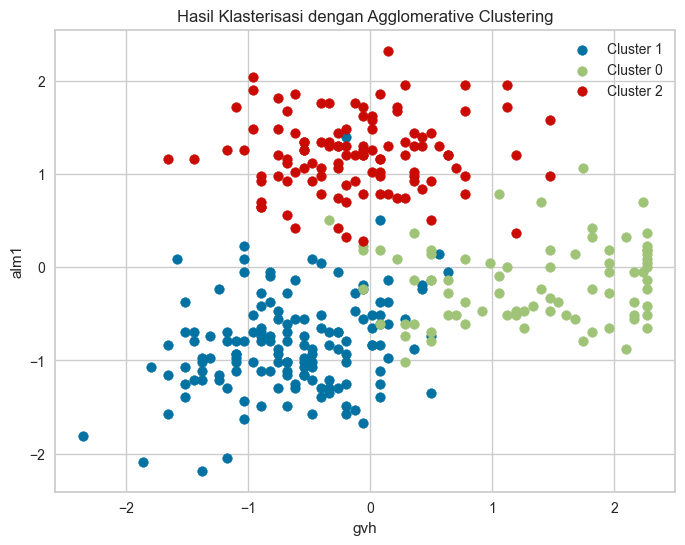

In [189]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.

feature1 = 'gvh'
feature2 = 'alm1'

plt.figure(figsize=(8, 6))
for cluster in data_cluster['Agg_clusters'].unique():
    cluster_data = data_cluster[data_cluster['Agg_clusters'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

plt.title('Hasil Klasterisasi dengan Agglomerative Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

1. Interpretasi hasil cluster yang terbentuk

Berdasarkan visualisasi di atas, dapat disimpulkan mengenai karakteristik masing-masing cluster yang terbentuk berdasarkan rata-rata fitur 'gvh' dan 'alm1'. Fitur 'gvh' dan 'alm1' cenderung rendah hingga menengah di cluster 1, tinggi di cluster 2, dan fitur ', dan fitur 'gvh' tinggi sementara 'alm1' rendah di cluster 0.

2. Empat algoritma clustering
* OPTICS alogrithm: algoritma berbasis urutan untuk mengidentifikasi struktur cluster berdasarkan jarak terhadap tetangga terdekat. Algoritma ini cocok untuk menangani data dengan kepadatan yang bervariasi.
* BIRCH algorithm: algoritma berjalan dengan cara membangun pohon hierarki menggunakan pendekatan k-means. Setiap cluster diwakili oleh centroid, jumlah titik, dan variasi. Algoritma ini cocok untuk clustering tipe data besar.
* Affinity Propagation: algoritma yang beroperasi secara iteratif dalam memperbarui pesan antar titik data. Keunggulan dari algoritma ini adalah sangat cocok untuk menentukan jumlah cluster secara otomatis.
* Mean-Shift: algoritma yang memindahkan titik data ke wilayah yang lebih padat (pusat cluster). Sangat baik digunakan untuk data dengan bentuk dan ukuran cluster yang beragam.

3. Matrik evaluasi untuk mengevaluasi hasil dari _clustering_:
* Silhouette Score:
    - Mengukur seberapa baik setiap sampel berada dalam klaster yang sudah terbentuk.
    - Nilai berkisar dari -1 (klaster yang salah) hingga 1 (klaster yang baik).
    - Nilai tinggi menunjukkan sampel terletak jauh dari klaster lain.
* Davies-Bouldin Index (DBI):
    - Mengukur kualitas klaster berdasarkan rata-rata jarak antar klaster dan dalam klaster.
    - Nilai rendah menunjukkan klaster yang lebih homogen dan terpisah.
* Calinski-Harabasz Index (CHI atau CBI):
    - Mengukur rasio dispersi dalam klaster dengan dispersi antar klaster.
    - Nilai tinggi menunjukkan klaster yang lebih terpisah dan homogen.

4. Inta-cluster similarity dan inter-cluster similarity

Intra-cluster similarity adalah ukuran seberapa mirip titik-titik data di dalam sebuah klaster. Hal ini diukur dengan mempertimbangkan kedekatan antara anggota klaster menggunakan metrik jarak, seperti rata-rata jarak antara setiap titik data dengan pusat klaster (centroid). Semakin tinggi nilai intra-cluster similarity, semakin seragam atau dekat titik-titik data di dalam klaster.

Inter-cluster dissimilarity mengukur seberapa jauh atau berbedanya klaster satu dengan yang lain. Ini dapat dihitung dengan mempertimbangkan seberapa jauh klaster satu dari klaster lainnya, misalnya, dengan mempertimbangkan jarak antara pusat klaster dari setiap klaster. Klaster yang dianggap baik memiliki intra-cluster similarity yang tinggi (titik-titik dalam klaster serupa) dan inter-cluster dissimilarity yang tinggi (klaster berbeda secara signifikan satu sama lain), yang memungkinkan untuk membedakan dengan jelas antara klaster satu dengan yang lainnya dalam analisis clustering.

5. Alasan K-means clustering tidak baik diterapkan pada data pengelompokkan yang tidak bersifat globular

* Sensitif terhadap Bentuk Klaster:
K-Means berusaha meminimalkan jumlah kuadrat jarak antara titik-titik data dengan pusat klaster terdekat. Ini mengasumsikan bahwa klaster berbentuk sferis atau globular, yang mana pusat klaster dan anggotanya terdistribusi secara merata dan terkonsentrasi dalam bentuk bola. Pada data yang tidak memiliki struktur seperti ini, K-Means mungkin menghasilkan klaster yang suboptimal karena pemusatan pada pusat-pusat klaster yang tidak merepresentasikan pola yang sesuai dengan bentuk data yang sebenarnya.

* Sensitif terhadap Inisialisasi Pusat Klaster:
Performa K-Means juga terpengaruh oleh inisialisasi awal pusat klaster. Pemilihan titik-titik awal sebagai pusat klaster dapat mempengaruhi hasil klasterisasi akhir. Inisialisasi yang buruk bisa menyebabkan K-Means terjebak di dalam solusi lokal yang suboptimal atau konvergensi ke klaster yang salah.

* Tidak Mampu Menangani Klaster dengan Bentuk yang Kompleks:
Algoritma K-Means cenderung tidak mampu menangani klaster dengan bentuk yang kompleks, seperti klaster yang saling tumpang tindih, berbentuk silinder, atau struktur yang berbentuk non-linier. Ini dapat mengakibatkan klasterisasi yang kurang akurat atau kesulitan dalam memisahkan klaster yang memiliki bentuk yang tidak umum.